In [391]:
import math
import yfinance as yf
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
from datetime import timedelta
from keras.layers import Input
pd.options.mode.chained_assignment = None

In [392]:
acao = "WEGE3.SA" #encontrar o jeito de pegar direto dos dados e modularizar o baguio

inicio = "2014-12-31"
final = "2022-09-15"

dados_acao = yf.download(acao, start=inicio, end=final)

print(dados_acao.head())


[*********************100%***********************]  1 of 1 completed

Price          Close      High       Low      Open   Volume
Ticker      WEGE3.SA  WEGE3.SA  WEGE3.SA  WEGE3.SA WEGE3.SA
Date                                                       
2015-01-02  4.949160  5.114667  4.908989  4.949160  3116360
2015-01-05  4.982904  4.990938  4.888100  4.982904  3908840
2015-01-06  4.908989  4.962015  4.788474  4.960409  4307160
2015-01-07  4.852748  4.937912  4.820610  4.902561  1829880
2015-01-08  4.934699  4.966836  4.851142  4.886492  1586000


In [393]:
cotacao = dados_acao['Close'].to_numpy().reshape(-1,1)


cotacao


array([[ 4.94915962],
       [ 4.98290443],
       [ 4.90898895],
       ...,
       [30.40976906],
       [29.27179718],
       [29.28135872]])

In [394]:
tamanho_dados_treinamento = int(len(cotacao)*0.8)

tamanho_dados_treinamento


1532

In [395]:
escalador = MinMaxScaler(feature_range=(0,1))

dados_entre_0_e_1_treinamento = escalador.fit_transform(cotacao[0: tamanho_dados_treinamento , :])

dados_entre_0_e_1_teste = escalador.transform(cotacao[tamanho_dados_treinamento : , :])

dados_entre_0_e_1 = list(dados_entre_0_e_1_treinamento.reshape(
    len(dados_entre_0_e_1_treinamento))) + list(dados_entre_0_e_1_teste.reshape(len(dados_entre_0_e_1_teste)))


dados_entre_0_e_1 = np.array(dados_entre_0_e_1).reshape(len(dados_entre_0_e_1) , 1)

dados_entre_0_e_1



array([[0.01805543],
       [0.01892742],
       [0.01701739],
       ...,
       [0.67597645],
       [0.64657041],
       [0.64681749]])

In [396]:
dados_para_treinamento = dados_entre_0_e_1[0:tamanho_dados_treinamento, :]

treinamento_x = []
treinamento_y = []

for i in range(60, len(dados_para_treinamento)):

    treinamento_x.append(dados_para_treinamento[i - 60:i, 0])
    
    treinamento_y.append(dados_para_treinamento[i, 0])

    if i <= 61:
        print(treinamento_x)
        print(treinamento_y)



[array([0.01805543, 0.01892742, 0.01701739, 0.01556409, 0.01768176,
       0.0171004 , 0.01639452, 0.01685128, 0.01888593, 0.01888593,
       0.01888593, 0.01955029, 0.02116965, 0.01975789, 0.02083749,
       0.02237379, 0.02079598, 0.0229967 , 0.02428387, 0.027315  ,
       0.02337039, 0.02694133, 0.02586173, 0.02652609, 0.02615237,
       0.02586173, 0.02606932, 0.02964035, 0.02864376, 0.02706586,
       0.02486517, 0.02469911, 0.02719041, 0.02511433, 0.02449149,
       0.02511433, 0.02263889, 0.02209562, 0.01795848, 0.02004792,
       0.02263889, 0.02242994, 0.02096729, 0.021636  , 0.01996434,
       0.01845994, 0.02025692, 0.02242994, 0.02180306, 0.01845994,
       0.01883604, 0.02071649, 0.02008968, 0.02134337, 0.01908675,
       0.0186689 , 0.01994079, 0.01759417, 0.02002458, 0.02358633])]
[0.023418738576512457]
[array([0.01805543, 0.01892742, 0.01701739, 0.01556409, 0.01768176,
       0.0171004 , 0.01639452, 0.01685128, 0.01888593, 0.01888593,
       0.01888593, 0.01955029, 0.02

In [397]:
#passando as listas para array e dando reshape para 3 dimensoes porque o modelo funciona assim
treinamento_x , treinamento_y = np.array(treinamento_x) , np.array(treinamento_y)

print(treinamento_x)

treinamento_x = treinamento_x.reshape(treinamento_x.shape[0], treinamento_x.shape[1], 1)

print(treinamento_x)


[[0.01805543 0.01892742 0.01701739 ... 0.01759417 0.02002458 0.02358633]
 [0.01892742 0.01701739 0.01556409 ... 0.02002458 0.02358633 0.02341874]
 [0.01701739 0.01556409 0.01768176 ... 0.02358633 0.02341874 0.02568153]
 ...
 [0.81646444 0.77520199 0.77556278 ... 0.85304123 0.82957121 0.83319048]
 [0.77520199 0.77556278 0.77111154 ... 0.82957121 0.83319048 0.82182561]
 [0.77556278 0.77111154 0.77953287 ... 0.83319048 0.82182561 0.8211003 ]]
[[[0.01805543]
  [0.01892742]
  [0.01701739]
  ...
  [0.01759417]
  [0.02002458]
  [0.02358633]]

 [[0.01892742]
  [0.01701739]
  [0.01556409]
  ...
  [0.02002458]
  [0.02358633]
  [0.02341874]]

 [[0.01701739]
  [0.01556409]
  [0.01768176]
  ...
  [0.02358633]
  [0.02341874]
  [0.02568153]]

 ...

 [[0.81646444]
  [0.77520199]
  [0.77556278]
  ...
  [0.85304123]
  [0.82957121]
  [0.83319048]]

 [[0.77520199]
  [0.77556278]
  [0.77111154]
  ...
  [0.82957121]
  [0.83319048]
  [0.82182561]]

 [[0.77556278]
  [0.77111154]
  [0.77953287]
  ...
  [0.8331

In [398]:
modelo = Sequential()

modelo.add(Input(shape=(treinamento_x.shape[1], 1)))
modelo.add(LSTM(50, return_sequences=True))

modelo.add(LSTM(50, return_sequences=False))

modelo.add(Dense(25))

modelo.add(Dense(1))


print("Número de passos de tempo usados como entrada (treinamento_x.shape[1]):", treinamento_x.shape[1])


Número de passos de tempo usados como entrada (treinamento_x.shape[1]): 60


In [399]:
modelo.compile(optimizer= "adam" , loss = "mean_squared_error")

In [400]:
modelo.fit(treinamento_x , treinamento_y , batch_size=10, epochs= 1)

148/148 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 0.0079


In [401]:
dados_teste = dados_entre_0_e_1[tamanho_dados_treinamento - 60: , :]

teste_x = []
teste_y = cotacao[tamanho_dados_treinamento: ,  :]

for i in range(60 , len(dados_teste)):
    teste_x.append(dados_teste[i-60 : i , 0])

In [402]:
teste_x = np.array(teste_x)
teste_x = teste_x.reshape(teste_x.shape[0], teste_x.shape[1] , 1)


In [403]:
predicoes = modelo.predict(teste_x)

predicoes = escalador.inverse_transform(predicoes)



predicoes

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


array([[39.730724],
       [39.334984],
       [38.86079 ],
       [38.39671 ],
       [37.978214],
       [37.604984],
       [37.265484],
       [37.003616],
       [36.811783],
       [36.67256 ],
       [36.54839 ],
       [36.44066 ],
       [36.335682],
       [36.24206 ],
       [36.139263],
       [36.044163],
       [35.990974],
       [35.958706],
       [35.99843 ],
       [36.078484],
       [36.19141 ],
       [36.35669 ],
       [36.554646],
       [36.747402],
       [36.931656],
       [37.08289 ],
       [37.203175],
       [37.286366],
       [37.363758],
       [37.47437 ],
       [37.581192],
       [37.656033],
       [37.667545],
       [37.614456],
       [37.563206],
       [37.507145],
       [37.43922 ],
       [37.34683 ],
       [37.202694],
       [37.00973 ],
       [36.76998 ],
       [36.47972 ],
       [36.206345],
       [35.92158 ],
       [35.6292  ],
       [35.301544],
       [34.96197 ],
       [34.589745],
       [34.231094],
       [33.910725],


In [404]:
rmse = np.sqrt(np.mean(predicoes - teste_y)**2)

rmse


2.4713192982088494

In [405]:
# Garanta que close_test é 1D
close_test = dados_acao['Close'].iloc[tamanho_dados_treinamento:].values
if close_test.ndim > 1:
    close_test = close_test.flatten()

# Garanta que predicoes_1d é 1D
predicoes_1d = predicoes
if predicoes.ndim > 1:
    predicoes_1d = predicoes.reshape(-1)

# Verifique shapes e tipos
print("close_test shape:", close_test.shape)
print("predicoes_1d shape:", predicoes_1d.shape)
print("close_test ndim:", close_test.ndim)
print("predicoes_1d ndim:", predicoes_1d.ndim)

# Ajuste para o menor tamanho para evitar erro de alinhamento
min_len = min(len(close_test), len(predicoes_1d))

index_test = dados_acao.index[tamanho_dados_treinamento:tamanho_dados_treinamento + min_len]

# Agora crie o DataFrame
df_teste = pd.DataFrame({
    "Close": close_test[:min_len],
    "predicoes": predicoes_1d[:min_len]
}, index=index_test)


close_test shape: (383,)
predicoes_1d shape: (383,)
close_test ndim: 1
predicoes_1d ndim: 1


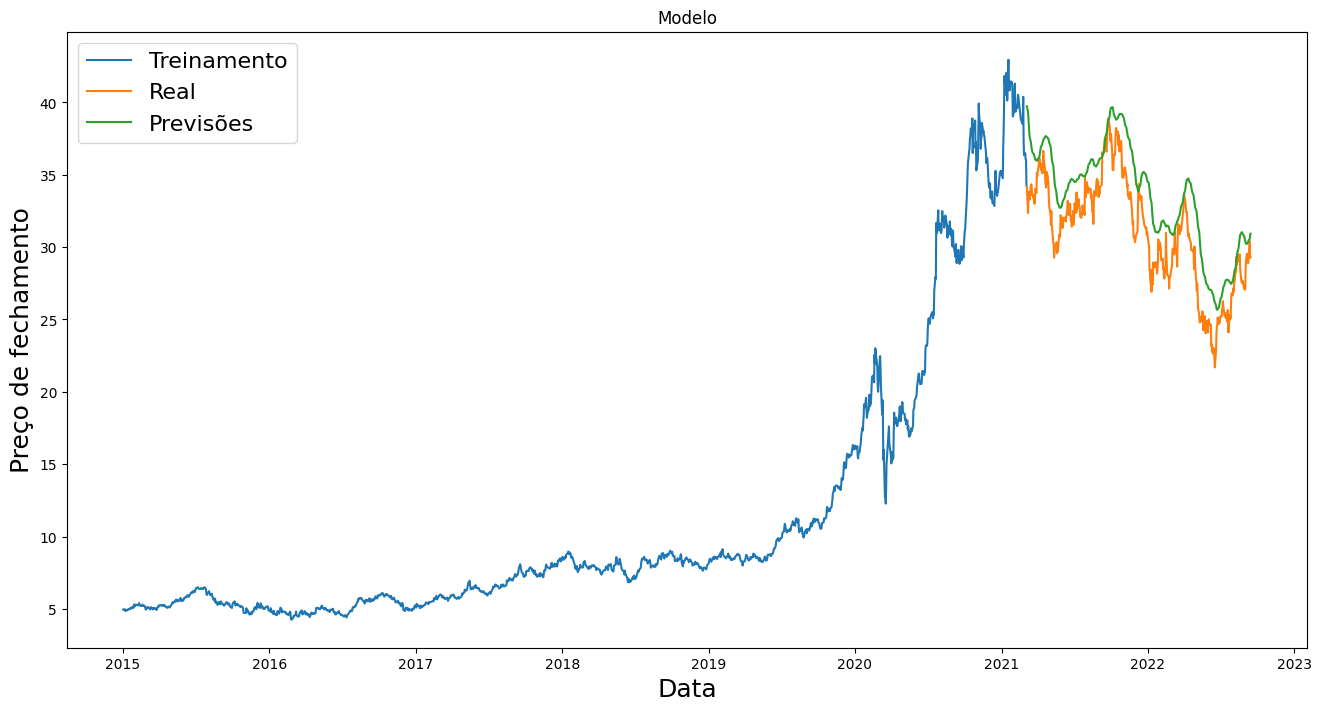

In [406]:
plt.figure(figsize=(16, 8))
plt.title('Modelo')
plt.xlabel('Data', fontsize=18)
plt.ylabel("Preço de fechamento", fontsize=18)

plt.plot(treinamento.index, treinamento['Close'], label='Treinamento')
plt.plot(df_teste.index, df_teste['Close'], label='Real')
plt.plot(df_teste.index, df_teste['predicoes'], label='Previsões')

plt.legend(loc=2, prop={'size': 16})
plt.show()

In [407]:
df_teste.sort_index()

df_teste

,Close,predicoes
Date,,
2021-03-05,34.173096,39.730724
2021-03-08,32.353096,39.334984
2021-03-09,33.452576,38.860790
2021-03-10,33.817509,38.396709
2021-03-11,33.649082,37.978214
...,...,...
2022-09-08,28.889282,30.353239
2022-09-09,29.118792,30.458763
2022-09-12,30.409769,30.580437


In [408]:
# Cálculo de variações
df_teste['variacao_percentual_acao'] = df_teste['Close'].pct_change()
df_teste['variacao_percentual_modelo'] = df_teste['predicoes'].pct_change()
df_teste = df_teste.dropna()

# Comparação de direção
df_teste['var_acao_maior_que_zero'] = df_teste['variacao_percentual_acao'] > 0
df_teste['var_modelo_maior_menor_que_zero'] = df_teste['variacao_percentual_modelo'] > 0
df_teste['acertou_o_lado'] = df_teste['var_acao_maior_que_zero'] == df_teste['var_modelo_maior_menor_que_zero']
df_teste['variacao_percentual_acao_abs'] = df_teste['variacao_percentual_acao'].abs()

# %%
# Estatísticas
acertou_lado = df_teste['acertou_o_lado'].mean()
errou_lado = 1 - acertou_lado
media_lucro = df_teste.groupby('acertou_o_lado')['variacao_percentual_acao_abs'].mean()
lucro_acerto = media_lucro.get(True, 0)
lucro_erro = media_lucro.get(False, 0)
exp_mat_lucro = acertou_lado * lucro_acerto - errou_lado * lucro_erro
ganho_sobre_perda = lucro_acerto / lucro_erro if lucro_erro != 0 else float('inf')

#estatisticas
print("Média de lucro (acertou=False, acertou=True):")
print(media_lucro)
print(f"\nGanho sobre perda: {ganho_sobre_perda:.2f}")
print(f"Taxa de acerto: {acertou_lado:.2%}")
print(f"Expectativa matemática de lucro: {exp_mat_lucro:.4f}")



Média de lucro (acertou=False, acertou=True):
acertou_o_lado
False    0.017061
True     0.016213
Name: variacao_percentual_acao_abs, dtype: float64

Ganho sobre perda: 0.95
Taxa de acerto: 49.48%
Expectativa matemática de lucro: -0.0006
